In [1]:
import time
start_time=time.time()

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
import pandas as pd
import math
import sys
import os
from PIL import Image
import seaborn as sns
from scipy import interpolate
from sabreMod import sosf,sosfn

In [3]:
#ARCHIVO
reg='595'
FitsFile= 'Obs/TAURUS.595.Ha.Sigma'
hdul=fits.open(FitsFile + '.fits')

Text(0.5, 1.0, 'H$_{α}$ σ$_{disp}$')

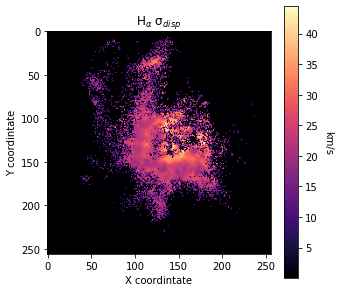

In [4]:
#IMAGEN
fig, ax = plt.subplots(figsize=(5, 5))


image_data=hdul[0].data
plt.imshow(image_data, cmap='magma')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('km/s', rotation=270, labelpad=15)  
plt.title('H$_{α}$ σ$_{disp}$')
#plt.savefig('TAURUS/'+reg+'SH.png')


In [5]:
#TABLA DATOS
sig=hdul[0].data
df=pd.DataFrame(sig)

In [6]:
dsig=df.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'Sig'})
dsig.describe()

,X,Y,Sig
count,65536.000000,65536.000000,6.553600e+04
mean,127.500000,127.500000,3.881712e+00
std,73.900834,73.900834,9.424380e+00
min,0.000000,0.000000,1.111131e-08
25%,63.750000,63.750000,1.111131e-08
50%,127.500000,127.500000,1.111131e-08
75%,191.250000,191.250000,1.111131e-08
max,255.000000,255.000000,4.444924e+01


In [7]:
#ARCHIVO
FitsFile= 'Obs/TAURUS.595.Ha.Flux'
hdul=fits.open(FitsFile + '.fits')

Text(0.5, 1.0, 'H$_{α}$ Flux')

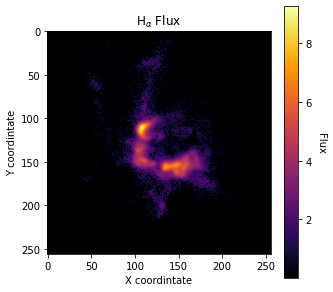

In [8]:
#IMAGEN
fig, ax = plt.subplots(figsize=(5, 5))


image_data=hdul[0].data
plt.imshow(image_data, cmap='inferno')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('Flux', rotation=270, labelpad=15)  
plt.title('H$_{α}$ Flux')
#plt.savefig('TAURUS/'+reg+'FH.png')

In [9]:
#TABLA DATOS
flx=hdul[0].data
df=pd.DataFrame(flx)

In [10]:
dffx=df.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'I'})
dffx.describe()

,X,Y,I
count,65536.000000,65536.000000,6.553600e+04
mean,127.500000,127.500000,2.822382e-01
std,73.900834,73.900834,8.645264e-01
min,0.000000,0.000000,2.314902e-09
25%,63.750000,63.750000,2.314902e-09
50%,127.500000,127.500000,2.314902e-09
75%,191.250000,191.250000,2.314902e-09
max,255.000000,255.000000,9.260010e+00


In [11]:
#ARCHIVO
FitsFile= 'Obs/TAURUS.595.Ha.RV'
#FitsFile= 'n604halphasigma'
hdul=fits.open(FitsFile + '.fits')

Text(0.5, 1.0, 'H$_{α}$ Radial Velocity')

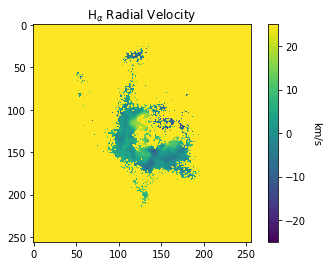

In [12]:
#IMAGEN
image_data=hdul[0].data
plt.imshow(image_data, cmap='viridis')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('km/s', rotation=270, labelpad=15)  
plt.clim(-25,25) 
plt.title('H$_{α}$ Radial Velocity')

#plt.savefig('TAURUS/'+reg+'RVH.png')

In [13]:
#TABLA DATOS
vel=hdul[0].data
df=pd.DataFrame(vel)
#dfv=df.stack()
#dfv

In [14]:
dfvr=df.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'RV'})
dfvr.describe()

,X,Y,RV
count,65536.000000,65536.000000,65536.000000
mean,127.500000,127.500000,290.868363
std,73.900834,73.900834,120.844926
min,0.000000,0.000000,-25.025787
25%,63.750000,63.750000,341.519989
50%,127.500000,127.500000,341.519989
75%,191.250000,191.250000,341.519989
max,255.000000,255.000000,341.519989


In [15]:
data=dfvr
data['I']=dffx.I
data['Sig']=dsig.Sig
data.describe()

,X,Y,RV,I,Sig
count,65536.000000,65536.000000,65536.000000,6.553600e+04,6.553600e+04
mean,127.500000,127.500000,290.868363,2.822382e-01,3.881712e+00
std,73.900834,73.900834,120.844926,8.645264e-01,9.424380e+00
min,0.000000,0.000000,-25.025787,2.314902e-09,1.111131e-08
25%,63.750000,63.750000,341.519989,2.314902e-09,1.111131e-08
50%,127.500000,127.500000,341.519989,2.314902e-09,1.111131e-08
75%,191.250000,191.250000,341.519989,2.314902e-09,1.111131e-08
max,255.000000,255.000000,341.519989,9.260010e+00,4.444924e+01


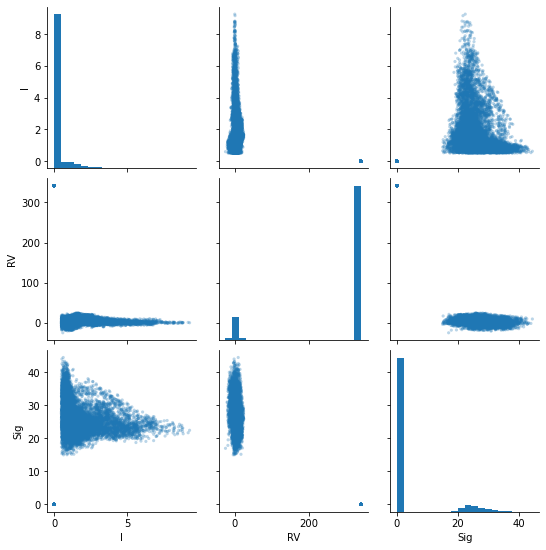

In [16]:
sns.pairplot(data, 
             vars=["I","RV","Sig"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

In [17]:
mI=data.I>data.I.mean()+0.5*data.I.std()
data=data[mI]


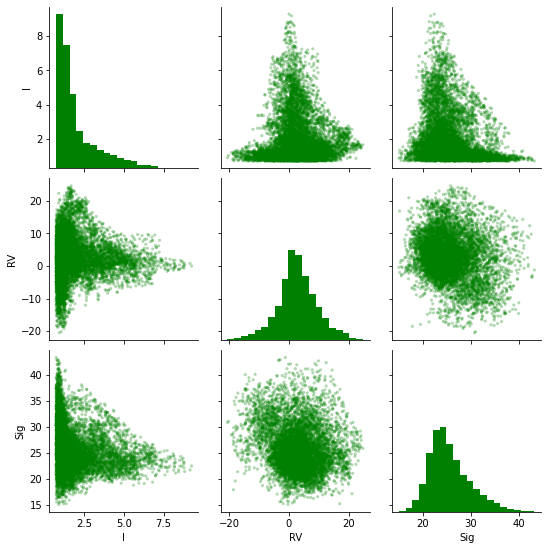

In [18]:
sns.pairplot(data, 
             vars=["I","RV","Sig"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none', color="green"),
             diag_kws=dict(bins=20, color="green"),
            )

#plt.savefig('TAURUS/'+reg+'CorrlHA.png')

In [19]:
data.describe()

,X,Y,RV,I,Sig
count,8765.000000,8765.000000,8765.000000,8765.000000,8765.000000
mean,129.266743,130.180947,2.821943,2.037856,25.628524
std,41.247226,31.236183,6.643250,1.409344,4.291403
min,11.000000,38.000000,-20.539368,0.714868,15.030182
25%,105.000000,110.000000,-0.919708,1.061956,22.650513
50%,136.000000,127.000000,2.495300,1.508847,24.844576
75%,159.000000,153.000000,6.669220,2.504355,27.989908
max,217.000000,205.000000,24.659454,9.260010,43.284180


Text(0.5, 1.0, 'H$_{α}$ Flux')

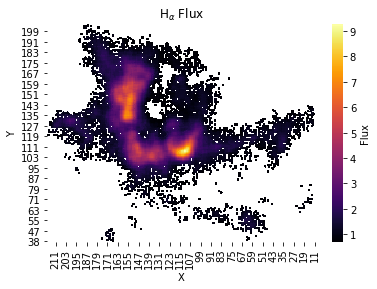

In [20]:
datal=data.copy()
#datal.I=np.log10(datal.I)
datal.X=datal.X.astype(int)
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
#fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataH_f, cmap="inferno",xticklabels='auto',cbar_kws={'label': 'Flux'})
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('H$_{α}$ Flux')
#plt.savefig('TAURUS/Imgs/A/'+reg+'FH.png')

Text(0.5, 1.0, 'H$_{α}$ Radial Velocity')

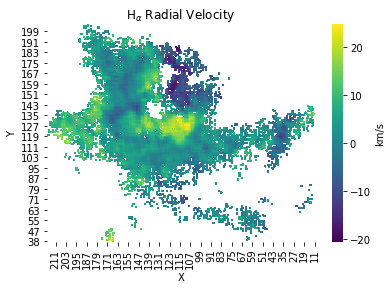

In [21]:
datal=data.copy()
dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
sns.heatmap(dataH_rv, cmap="viridis",cbar_kws={'label': 'km/s'})
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('H$_{α}$ Radial Velocity')
#plt.savefig('TAURUS/Imgs/A/'+reg+'RVH.png')

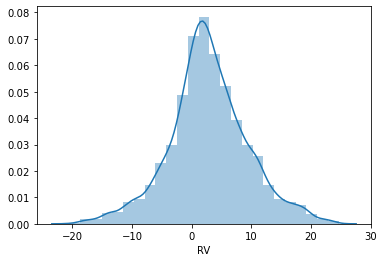

In [22]:
sns.distplot(data.RV,bins=25)


Text(0.5, 1.0, 'H$_{α}$ σ$_{disp}$')

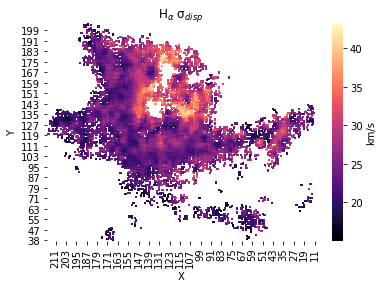

In [23]:
datal=data.copy()
dataH_s=(datal.round(2)).pivot(index='Y', columns='X', values='Sig')
sns.heatmap(dataH_s, cmap="magma",cbar_kws={'label': 'km/s'})
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('H$_{α}$ σ$_{disp}$')
#plt.savefig('TAURUS/Imgs/A/'+reg+'SH.png')

In [24]:
data.Sig=(data.Sig**2-9.87**2-14.5**2)**0.5

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0, 0.5, '$σ_{disp}$ [km/s]')

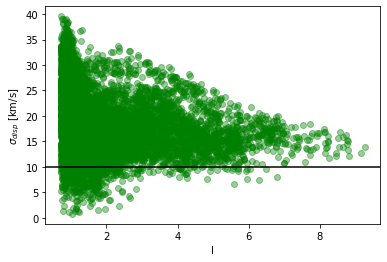

In [25]:
fig, ax = plt.subplots()
plt.scatter(data.I,data.Sig,alpha=0.4, color='green')
#plt.title(LineN[i])

plt.axhline(y=10, color='k', linestyle='-')
#plt.axhline(y=22.5, color='k', linestyle='--')
#plt.axhline(y=25.6, color='k', linestyle='-.')
#plt.axhline(y=12, color='k', linestyle=':')

ax.set_xlabel('I')
ax.set_ylabel('$σ_{disp}$ [km/s]')

In [26]:
pc=1.05

1.0


[None, None]

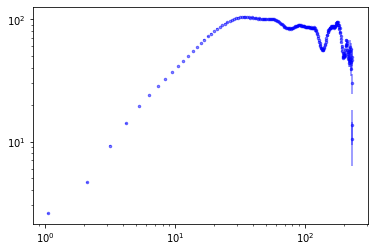

In [27]:
SF=sosf(data)
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [28]:
x=SF['Lag']
y=SF['Nmqvd']-(data["RV"].std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([ 11.17051122, 218.24045867, 218.30707878, 221.97510765,
       222.36735514, 225.35153703, 226.58268009, 228.9498212 ])

In [29]:
s=SFr[0]

In [30]:
ss=np.round((data['RV'].std())**2,2)

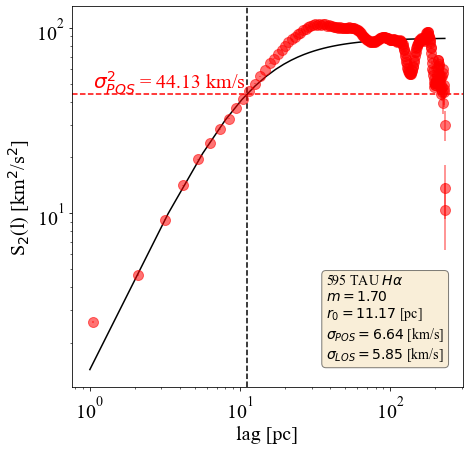

In [33]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="red", ecolor="red",
                     alpha=0.55, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=ss, color='r', linestyle='--')
ax.text(0.25, 0.8,'$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=1.7

x=np.linspace(int(SF.Lag.min()),int(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('595 TAU ' r'$Hα$' ,r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (data["RV"].std()) + ' [km/s]' , r'$σ_{LOS}=%.2f$'%(data["Sig"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

#ax.set_xlim(1, 250)
#ax.set_ylim(1, 750)

#fig.savefig('Img//'+samples[0][i]+'.pdf')

In [32]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 937.7361583709717 seconds ---
